In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from tqdm.auto import tqdm

C:\Users\Drogias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.conditional_ngram_models import BigramSpellCorrector, TrigramSpellCorrector
from src.ngram_models import BigramModel, START_TOKEN, END_TOKEN, UNKNOWN_TOKEN, TrigramModel, BaseNgramModel

## The Dataset

In [3]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Drogias\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [4]:
movie_corpus = nltk.corpus.movie_reviews.fileids()                                 #Get all the files
movie_corpus

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [5]:
combined_text = ""             
for file_id in movie_corpus:                                        # Combine the text from all files
    combined_text += nltk.corpus.movie_reviews.raw(file_id)

print(combined_text[:500])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt


In [6]:
combined_text = combined_text.lower()                              #Convert to lowercase

In [7]:
combined_text[:500]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt'

In [8]:
import re

def remove_special_chars(text):
   text = text.replace('[', '')
   text = text.replace(']', '')
   text = text.replace('\n', ' ')
   text = re.sub(r'[^a-zA-z.?!\']', ' ', text)                     #Remove these characters   

   return text

In [9]:
combined_text = remove_special_chars(combined_text)
combined_text[:500]

"plot   two teen couples go to a church party   drink and then drive .  they get into an accident .  one of the guys dies   but his girlfriend continues to see him in her life   and has nightmares .  what's the deal ?  watch the movie and   sorta   find out . . .  critique   a mind fuck movie for the teen generation that touches on a very cool idea   but presents it in a very bad package .  which is what makes this review an even harder one to write   since i generally applaud films which attempt"

In [10]:
combined_text[1500:2500]

" is this film's biggest problem .  it's obviously got this big secret to hide   but it seems to want to hide it completely until its final five minutes .  and do they make things entertaining   thrilling or even engaging   in the meantime ?  not really .  the sad part is that the arrow and i both dig on flicks like this   so we actually figured most of it out by the half way point   so all of the strangeness after that did start to make a little bit of sense   but it still didn't the make the film all that more entertaining .  i guess the bottom line with movies like this is that you should always make sure that the audience is   into it   even before they are given the secret password to enter your world of understanding .  i mean   showing melissa sagemiller running away from visions for about    minutes throughout the movie is just plain lazy ! !  okay   we get it . . . there  are people chasing her and we don't know who they are .  do we really need to see it over and over again ?

In [11]:
combined_text[60000:61000]

"lverstone movie ever .  and you already know from the last paragraph what the competition is like .  where to begin in criticizing this movie ?  the plot is a thin shred that moves slower than a glacier   the writing could have been done   and for all we know it was   by a ten year old   alicia is the star and she's still wasted in a movie that has no appeal whatsoever .  there is zero humor   zero suspense   zero drama and zero action   until the last ten minutes   when the story is needlessly and pointlessly concluded with a violent sequence .  zero plus zero plus zero plus zero equals zero .  so why does this movie get one star out of me ?  well   alicia spends twenty minutes of the movie in the bathtub .  and if it wasn't bubble bath   the babysitter would have instantly joined the ranks of our other four  star features   but you settle for what you can get .  alicia plays a babysitter who's spending friday night looking after two kids whose parents are out getting drunk at a cock

In [12]:
combined_text[7780000:-1]

"is is the film of the year .  truman     true man     burbank is the perfect name for jim carrey's character in this film .  president truman was an unassuming man who became known worldwide   in spite of   or was it because of   his stature .     truman   also recalls an era of plenty following a grim war   an era when planned communities built by government scientists promised an idyllic life for americans .  and burbank   california   brings to mind the tonight show and the home of nbc .  if hollywood is the center of the film world   burbank is   or was   the center of tv's world   the world where our protagonist lives .  combine all these names and concepts into   truman burbank     and you get something that well describes him and his artificial world .  truman leads the perfect life .  his town   his car   and his wife are picture perfect .  his idea of reality comes under attack one day when a studio light falls from the sky .  the radio explains that an overflying airplane st

In [13]:
len(combined_text.split())                     

1375247

In [14]:
len(combined_text)                             # How many characters

7785824

In [15]:
combined_text[11792000:]

''

In [16]:
def tokenize_sentences(text):
    sentences = nltk.sent_tokenize(''.join(text))                  #Get the sentences
    return sentences     

In [17]:
sentences = tokenize_sentences(combined_text) 
print(len(sentences))    
print(sentences[2])  
print(sentences[57649])

71360
one of the guys dies   but his girlfriend continues to see him in her life   and has nightmares .
that's okay   because director john mcnaughton knows that he's making a self consciously wicked film .


In [18]:
def tokenize_words(text):
    words = nltk.word_tokenize(text)
    return words

In [19]:
words = tokenize_words(combined_text)
print(len(words))
print(words[3])
print(words[-2])

1405016
couples
be


In [20]:
words_list = []                                    #list of all the words of sentences
for f in sentences:
    words_list.append(tokenize_words(f))                   

In [21]:
len(words_list)

71360

In [22]:
for word in words_list[1]:                     # all the words of the second sentence
    print(word) 

they
get
into
an
accident
.


In [23]:
import random
import math


random.shuffle(words_list)
train_len = math.floor(0.6 * len(words_list))                      #Training set length(60%)
dev_len = math.floor(0.2 * len(words_list))                        #Development set length (20%)
test_len = math.floor(0.2 * len(words_list))                       #Test set length (20%)

training_set = []
development_set = []
test_set = []

for content in words_list[0:train_len]:
    training_set.append(content)
    
for content in words_list[train_len: train_len + dev_len]:
    development_set.append(content)

for content in words_list[train_len + dev_len:]:
    test_set.append(content)

In [24]:
import itertools
from collections import Counter

from nltk.util import ngrams


def _calc_ngrams(all_corpus: list[str], ngram: int) -> Counter:
    """
    Process a tokenized sentence into a list of ngrams.
    :param all_corpus: a list of all the corpus words
    :param ngram: whether the ngrams will be unigrams, bigrams etc
    :return: the counter of either unigram, bigram or trigram
    """
    unigram_counter = Counter()
    bigram_counter = Counter()
    trigram_counter = Counter()
     
    

    if ngram == 1 :
        for sentence in all_corpus:
             grams = [gram for gram in ngrams(sentence, ngram, pad_left=True, pad_right=True,
                                    left_pad_symbol=START_TOKEN, right_pad_symbol=END_TOKEN)]
             unigram_counter.update(grams)
        return unigram_counter
        
    elif ngram == 2:
        for sentence in all_corpus:
             grams = [gram for gram in ngrams(sentence, ngram, pad_left=True, pad_right=True,
                                    left_pad_symbol=START_TOKEN, right_pad_symbol=END_TOKEN)]
             bigram_counter.update(grams)
        return bigram_counter
        
    elif ngram == 3:
        for sentence in all_corpus:
             grams = [gram for gram in ngrams(sentence, ngram, pad_left=True, pad_right=True,
                                    left_pad_symbol=START_TOKEN, right_pad_symbol=END_TOKEN)]
             trigram_counter.update(grams)
        return trigram_counter
        
    return 0

In [25]:
def replace_OOV_words_train(all_corpus):
    unigram_counter = _calc_ngrams(all_corpus,1)
    OOV_words = {}

    for k, v in unigram_counter.items():
        if v < 10:
            key = k[0]
            # README: Use the symbol UNKOWN_TOKEN else the model will think it's a word
            OOV_words[key] = UNKNOWN_TOKEN                 #set the word to "UNK"

    replaced_corpus = []                          #the original corpus having the OOV words replaced by 'UNK'
    for sentence in all_corpus:
        clean_sentence = []
    
        for word in sentence:
            clean_sentence.append(OOV_words.get(word, word))
    
        replaced_corpus.append(clean_sentence)


    vocabulary = []

    for key in unigram_counter.keys():        #Iterate the unigram counter
        word = key[0]                         #get the word
        if word not in OOV_words:
            vocabulary.append(word)

    vocabulary = set(vocabulary)              #Keep unique words
    return vocabulary, replaced_corpus, OOV_words

In [26]:
def replace_OOV_words_test(all_corpus, vocabulary, oov_words):
    
    replaced_corpus = []
    for sentence in all_corpus:
        updated_sent = []

        for word in sentence:
            if (word not in vocabulary) or (word in oov_words):
                updated_sent.append(UNKNOWN_TOKEN)
            else:
                updated_sent.append(word)
                
    replaced_corpus.append(updated_sent)
    return replaced_corpus   

In [27]:
vocabulary, train_corpus, OOV_words = replace_OOV_words_train(training_set)
development_set = replace_OOV_words_test(development_set, vocabulary, OOV_words)
test_set = replace_OOV_words_test(test_set, vocabulary, OOV_words)

In [28]:
vocab_len = len(vocabulary)
print ("Vocabulary length: ", vocab_len)

print("Unigram's 20 most common words:")
unigram_top_20 = _calc_ngrams(train_corpus, 1).most_common(20)
for gram in unigram_top_20:
    print(gram)

print("\n")
print("Bigram's 20 most common words:")
bigram_top_20 = _calc_ngrams(train_corpus,2).most_common(20)
for gram in bigram_top_20:
    print(gram)


print("\n")
print("Trigram's 20 most common words:")
trigram_top_20 = _calc_ngrams(train_corpus,3).most_common(20)
for gram in trigram_top_20:
    print(gram)

Vocabulary length:  6638
Unigram's 20 most common words:
(('<UNK>',), 65699)
(('the',), 46170)
(('.',), 39575)
(('a',), 22949)
(('and',), 21453)
(('of',), 20618)
(('to',), 19051)
(('is',), 15722)
(('in',), 13136)
(("'s",), 10969)
(('that',), 9665)
(('it',), 9632)
(('as',), 6809)
(('with',), 6529)
(('for',), 5940)
(('this',), 5731)
(('his',), 5702)
(('film',), 5667)
(('i',), 5432)
(('he',), 5330)


Bigram's 20 most common words:
(('.', '<end>'), 39540)
(('<UNK>', '<UNK>'), 7446)
(('the', '<UNK>'), 5483)
(('<UNK>', '.'), 5451)
(('of', 'the'), 5357)
(('<start>', 'the'), 4963)
(('<UNK>', 'and'), 3916)
(('in', 'the'), 3493)
(('a', '<UNK>'), 3262)
(('the', 'film'), 2743)
(('and', '<UNK>'), 2707)
(('<UNK>', 'of'), 2387)
(('<start>', '<UNK>'), 2258)
(('?', '<end>'), 2246)
(('it', "'s"), 2208)
(('<UNK>', 'the'), 2097)
(('<start>', '.'), 1936)
(('of', '<UNK>'), 1924)
(('<start>', 'it'), 1906)
(('is', 'a'), 1813)


Trigram's 20 most common words:
(('.', '<end>', '<end>'), 39540)
(('<UNK>', '.', '

In [29]:
from nltk.tokenize import sent_tokenize, TweetTokenizer


UNK_sentences = [sent_tokenize(' '.join(sentence)) for sentence in train_corpus]       #get the sentences that include UNK values
tweet_wt = TweetTokenizer()
tokenized = [tweet_wt.tokenize(' '.join(sentence)) for sentence in UNK_sentences[:50]]  # Get the first 50 sentences

##  Calculate bi-gram probability

### $ P(w_2|w_1) = \frac{C(w_1,w_2) + \alpha}{C(w_1) + \alpha \cdot|V|} $

* $ C(w_1,w_2) $ : bigram count
* $ C(w_1) $ : unigram count
* $ 0 \leq\alpha \leq1 $ :  smoothing hyper-parameter
* |V|: vocabulary size

## Bi-gram LM Cross entropy & perplexity

* $ CrossEntropy = -\frac{1}{N}\sum^{bigrams}{log_2(P(w_2|w_1))} $
 * N: Number of bigrams
* $ Perplexity = 2^{H(p)} $

## Tri-gram LM Cross entropy & perplexity

### $ P(w_3|w_1,w_2) = \frac{C(w_1,w_2,w_3) + \alpha}{C(w_1,w_2) + \alpha \cdot |V|} $

* $ C(w_1,w_2,w_3) $ : trigram count
* $ C(w_1,w_2) $ : bigram count
* $ 0 \leq\alpha \leq1 $ :  smoothing hyper-parameter
* |V|: vocabulary size

In [30]:
def cross_entropy(model: BaseNgramModel, dataset: list[list[str]]) -> float:
    """
    Calculate the cross-entropy of a language model on a given dataset.
    
    Cross-entropy measures how well the language model predicts the given dataset.
    Lower cross-entropy indicates better model performance.
    
    :param model: The n-gram language model for which cross-entropy is calculated.
    :param dataset: The dataset as a list of tokenized sentences, where each sentence is a list of strings.
    :return: The cross-entropy score as a float.
             Lower values indicate better performance in predicting the dataset.
    """
    # since la place smoothing is only involved during inference
    # we don't need to refit the model
    sum_prob = 0
    word_count = 0
    
    for sentence in dataset:       
        # since this is a full sentence we manually append the end token
        sentence += [END_TOKEN]
        
        # take into account only the END_TOKEN since START token probs are not computed
        word_count += len(sentence)
        
        # get sentence probability
        sum_prob += bi_model.sentence_proba(sentence) 
    
    # do we need to logarithmize this again?
    return - sum_prob / word_count


def perplexity(cross_entropy: float) -> float:
    """
    Calculate perplexity from cross-entropy.
    
    Perplexity is a measure of how well the language model predicts the given dataset.
    A model with a perplexity of k, has approximately a 1/k chance of correctly predicting the next word in a sentence.
    
    :param cross_entropy: The cross-entropy score calculated for a language model on a dataset.
    :return: The perplexity score as a float.
             Lower values indicate better performance in predicting the dataset.
    """
    return 2**cross_entropy

In [31]:
def plot_alpha_vs_entropy(alpha_values, entropy, best_index):
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, entropy, marker='o', linestyle='-', color='b')
    plt.title('Alpha vs Entropy')
    plt.xlabel('Alpha Values')
    plt.ylabel('Cross Entropy')
    plt.grid(True)
    
    # Highlight the best alpha value
    plt.scatter(alpha_values[best_index], entropy[best_index], color='r', marker='x', label='Best Alpha')
    
    plt.legend()
    plt.show()


In [32]:
def ngram_model_alpha_search(fitted_model: BaseNgramModel, 
                             alpha_values: np.ndarray, 
                             validation_dataset: list[list[str]]) -> float:
    entropy_arr = np.full_like(alpha_values, np.inf)
    
    for i in range(len(alpha_values)):
        fitted_model.alpha = alpha_values[i]
        entropy_arr[i] = cross_entropy(fitted_model, validation_dataset)
        
       
    best_index = np.argmin(entropy_arr)
    plot_alpha_vs_entropy(alpha_values,entropy_arr, best_index) 
    return alpha_values[best_index]

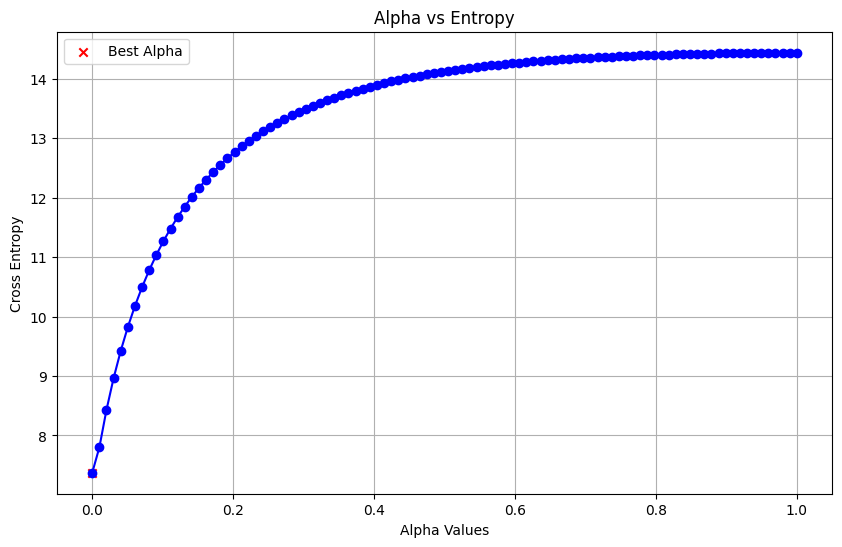

Optimal alpha (bigram model):  0.0001


In [33]:
bi_model = BigramModel(alpha=0.001)
bi_model.fit(train_corpus)

bi_opt_alpha = ngram_model_alpha_search(bi_model, np.linspace(0.0001, 1, 100), development_set)
print("Optimal alpha (bigram model): ", bi_opt_alpha)

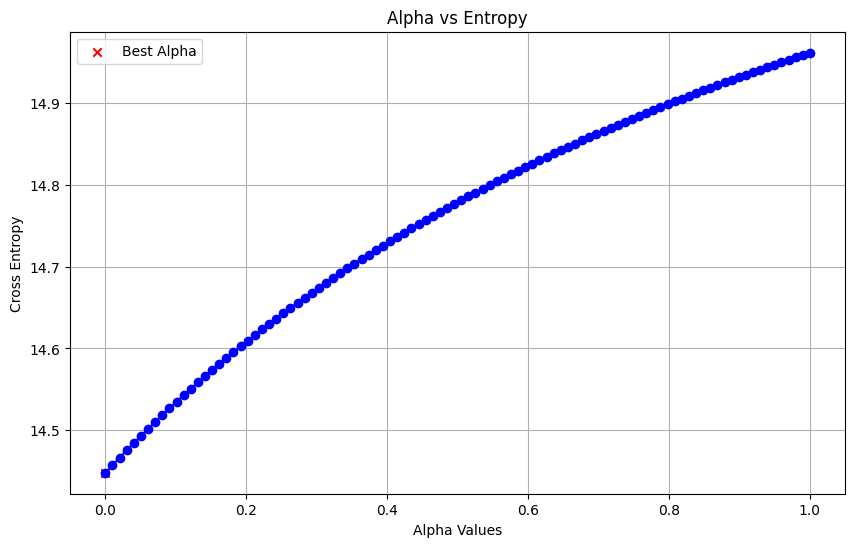

Optimal alpha (trigram model):  0.0001


In [34]:
tri_model = TrigramModel(alpha=0.001)
tri_model.fit(train_corpus)

tri_opt_alpha = ngram_model_alpha_search(tri_model, np.linspace(0.0001, 1, 100), development_set)
print("Optimal alpha (trigram model): ", tri_opt_alpha)

Now, let's test the performance in the test set, after having defined the optimal alpha.

In [35]:
# since la place smoothing is only involved during inference
# we don't need to refit the model
bi_model.alpha = bi_opt_alpha

bi_hc = cross_entropy(bi_model, test_set)
print(f"Bi-gram model Cross Entropy: {bi_hc:.2f}", )
print(f"Bi-gram model Perplexity: {perplexity(bi_hc):2f}")

Bi-gram model Cross Entropy: 7.86
Bi-gram model Perplexity: 231.611529


In [36]:
tri_model.alpha = tri_opt_alpha

tri_hc = cross_entropy(tri_model, test_set)
print(f"Tri-gram model Cross Entropy: {tri_hc:.2f}")
print(f"Tri-gram model Perplexity: {perplexity(tri_hc):.2f}")

Tri-gram model Cross Entropy: 8.45
Tri-gram model Perplexity: 349.79


In [37]:
max_depth = 5
beam_width = 3

v. Create a fake dataset

In [38]:
import random


def corrupt_sentence(sentence, probability):
    corrupted_sentence = ""
    for char in sentence:
        if char != ' ' and random.random() < probability:
            
            corrupted_sentence += get_similar_char(char)                 #replace with a similar character
        else:
            corrupted_sentence += char
    return corrupted_sentence


def get_similar_char(char):
    # later on maybe use the nlpaug library here 
    similar_chars = {
        'a': 'e',
        'b': 'p',
        'c': 's',
        'd': 'b',
        'e': 'a',
        'f': 't',
        'g': 'j',
        'h': 'n',
        'i': 'l',
        'j': 'g',
        'k': 'x',
        'l': 'i',
        'm': 'n',
        'n': 'm',
        'o': 'u',
        'p': 'b',
        'q': 'g',
        'r': 't',
        's': 'c',
        't': 'f',
        'u': 'o',
        'v': 'w',
        'w': 'v',
        'x': 'k',
        'y': 'v',
        'z': 's',
    }
    
    return similar_chars.get(char, char)                            #return a randomly chosen character

In [39]:
probability = 0.1                                        #probability of character replacement
corrupted_corpus = [[corrupt_sentence(word, probability) for word in sentence] for sentence in UNK_sentences]   #generate the corrupted corpus
corrupted_tokenized = [tweet_wt.tokenize(sentence) for sentence_list in corrupted_corpus for sentence in sentence_list] #tokenize the corrupted sentences

for original, corrupted in zip(UNK_sentences[:5], corrupted_corpus[:5]):
    print(f"Original: {original}")
    print(f"Corrupted: {corrupted}")
    print("\n---\n")

Original: ["this movie is definitely not for young children which should n't really be a problem seeing as how only teenagers if anyone would likely find it appealing ."]
Corrupted: ["this movie is definiteiy not fot voung shilbten which should n't realiy be a problem seeing as how only teemagers it anyone wuuld likely find it appealing ."]

---

Original: ['.']
Corrupted: ['.']

---

Original: ['to say it more <UNK> jim carrey might <UNK> you more but this guy is even less funny .']
Corrupted: ['to sav it mora <UNK> gim cartey might <UNK> you more but this guy is evan less funny .']

---

Original: ["but even that interpretation assumes that characterization has to be consistent and in generations that just does n't happen ."]
Corrupted: ["puf even that interpretation assomec that cheracterizafion has to be consistent amd in genetations that jost doas n'f happen ."]

---

Original: ['when <UNK> learns of the fortress of ultimate darkness which supposedly contains the most fabulous obj

In [40]:
import jiwer


def calculate_wer_cer(original_sentences, corrected_sentences):
    wer_sum = 0
    cer_sum = 0
    total_sentences = len(original_sentences)

    for original, corrected in zip(original_sentences, corrected_sentences):
        wer = jiwer.wer(original, corrected)
        
        wer_sum += wer

        
        cer = jiwer.cer(original, corrected)
        cer_sum += cer

    
    avg_wer = wer_sum / total_sentences
    avg_cer = cer_sum / total_sentences

    return avg_wer, avg_cer

In [41]:

bi_corrected = []
corrector = BigramSpellCorrector(bi_model, lamda=0.1)

for sent in tqdm(corrupted_tokenized[:3]):
    output_seq = corrector.spell_correct(original_tokenized_sentence=sent, beam_width = 3)  #give the corrupt sentences to spell correct
    bi_corrected.append(output_seq)

# made one print so it is visualized better
print('Sample original sentence:', UNK_sentences[0])
print('\n')
print('Corrupted(wrong) sentence:', corrupted_corpus[0])
print('\n')
print('Final bi-gram result (corrected sentence):', " ".join(bi_corrected[0]))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]

Sample original sentence: ["this movie is definitely not for young children which should n't really be a problem seeing as how only teenagers if anyone would likely find it appealing ."]


Corrupted(wrong) sentence: ["this movie is definiteiy not fot voung shilbten which should n't realiy be a problem seeing as how only teemagers it anyone wuuld likely find it appealing ."]


Final bi-gram result (corrected sentence): this movie is definitely not for young children which should n't really be a problem seeing as how only teenagers if anyone would likely find it appealing .


In [42]:
avg_wer, avg_cer = calculate_wer_cer(tokenized, bi_corrected)

print(f"Bigram Average Word Error Rate (WER): {avg_wer:.3f}")
print(f"Bigram Average Character Error Rate (CER): {avg_cer:.3f}")

Bigram Average Word Error Rate (WER): 0.006
Bigram Average Character Error Rate (CER): 0.009


In [45]:
tri_corrected = []
corrector = TrigramSpellCorrector(tri_model, lamda=0.1)

for sent in tqdm(corrupted_tokenized[:3]):
    output_seq = corrector.spell_correct(original_tokenized_sentence=sent, beam_width = 3)  #give the corrupt sentences to spell correct
    tri_corrected.append(output_seq)
    
print('Sample original sentence:', UNK_sentences[0])
print('\n')
print('Corrupted(wrong) sentence:', corrupted_corpus[0])
print('\n')
print('Final tri-gram result (corrected sentences):', " ".join(tri_corrected[0]))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.25s/it]

Sample original sentence: ["this movie is definitely not for young children which should n't really be a problem seeing as how only teenagers if anyone would likely find it appealing ."]


Corrupted(wrong) sentence: ["this movie is definiteiy not fot voung shilbten which should n't realiy be a problem seeing as how only teemagers it anyone wuuld likely find it appealing ."]


Final tri-gram result (corrected sentences): this movie is definitely not for young children which should n't really be a problem seeing as how only teenagers if anyone would likely find it appealing .


In [46]:
avg_wer, avg_cer = calculate_wer_cer(tokenized, tri_corrected)

# im looking into this
print(f"Trigram Average Word Error Rate (WER): {avg_wer}")
print(f"Trigram Average Character Error Rate (CER): {avg_cer}")

Trigram Average Word Error Rate (WER): 0.01263157894736842
Trigram Average Character Error Rate (CER): 0.014411764705882353
